In [9]:
import numpy as np
import sys
sys.path.append("code")
sys.path.append("train_data_bvh")

# import nn
import torch.nn as nn
import numpy as np
import os
import torch
from generate_training_data import generate_traindata_from_bvh

# from loss_evaluation import calculate_mse_loss, proccess

In [3]:



Seq_len=100

def calculate_mse_loss( out_seq, groundtruth_seq):


        loss_function = nn.MSELoss()
        mse = loss_function(out_seq, groundtruth_seq)
        return mse.item()



def proccess(representation):
    if representation == '6d':
        print("6d to positional - calculate the MSE")
        # This is the directory where the original sequence files are stored
        src_bvh_folder = './tmp/6d_train_tmp_bvh_aclstm_martial/'
        # This is the directory where we will store the generated tranning data 
        tar_traindata_folder = './tmp/eval_tmp/6dBVH_to_pos/'
        if not os.path.exists(tar_traindata_folder):
            os.makedirs(tar_traindata_folder)
        generate_traindata_from_bvh(src_bvh_folder, tar_traindata_folder, representation='positional')
        
    elif representation == 'euler_angles':
        print("Converting Eulers angles to positional - calculate the MSE")
        src_bvh_folder = './tmp/euler_train_tmp_bvh_aclstm_martial/'
        tar_traindata_folder = './tmp/eval_tmp/eulerBVH_to_pos/'
        if not os.path.exists(tar_traindata_folder):
            os.makedirs(tar_traindata_folder)
        generate_traindata_from_bvh(src_bvh_folder, tar_traindata_folder, representation='positional')

    elif representation == 'positional':
        print("positional data - calculate the MSE")

        src_bvh_folder = './tmp/train_tmp_bvh_aclstm_martial/'
        tar_traindata_folder = './tmp/eval_tmp/posBVH_to_pos/'
        if not os.path.exists(tar_traindata_folder):
            os.makedirs(tar_traindata_folder)
        generate_traindata_from_bvh(src_bvh_folder, tar_traindata_folder, representation='positional')
        #move to proccessign the positional data directly and compute the loss - the trainning data is already in the directory

    else:
        #  quaternion
        print("Converting quaternions to positional - calculate the MSE")
        src_bvh_folder = './tmp/quar_train_tmp_bvh_aclstm_martial/'
        # is the dir don not exist, create it
        tar_traindata_folder = './tmp/eval_tmp/quarBVH_to_pos/'
        if not os.path.exists(tar_traindata_folder):
            os.makedirs(tar_traindata_folder)
        generate_traindata_from_bvh(src_bvh_folder, tar_traindata_folder, representation='positional')
    return src_bvh_folder, tar_traindata_folder






Converting quaternions to positional - calculate the MSE
Generating training data for ./tmp/quar_train_tmp_bvh_aclstm_martial/
Processing 0000000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0000000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0001000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0001000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0002000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0002000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0003000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0003000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0004000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0004000_out.bvh
---------------------------get_positional

In [22]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

# Convert bvh files to positional fisrt and then calsulate the MSE loss
def calculate_and_plot_mse_loss(representation, calculate_mse_loss, proccess):
    # chnage the representation to "positional", "euler_angles", "6d", "quaternions"
    _, tar_traindata_folder = proccess(representation)

    print("-----------------------------------")
    print("Calculate the MSE loss for the generated positional data")
    loss_values = []
    for file in os.listdir(tar_traindata_folder):
        if file.endswith('_gt.bvh.npy'):
            out_file = file.replace('_gt.bvh.npy', '_out.bvh.npy')
            print(f"out_file: {out_file}")
            print(f"file: {file}")

            if out_file in os.listdir(tar_traindata_folder):
                gt_seq = torch.from_numpy(np.load(os.path.join(tar_traindata_folder, file)))
                out_seq = torch.from_numpy(np.load(os.path.join(tar_traindata_folder, out_file)))

                loss_value = calculate_mse_loss(out_seq, gt_seq)
                loss_values.append(loss_value)

                file_name = file.replace('_gt.bvh.npy', '')
                print(f"Loss for {file_name} iteration weight model: {loss_value:.6f}")


    plt.figure(figsize=(12, 6))
    plt.plot(loss_values)
    plt.title(f'MSE loss for the generated positional data for {representation} representation')
    # make the plot bigger

    plt.ylabel('MSE loss')
    plt.xlabel('iteration weight model(x1000)')

    plt.text(0.95, 0.95, representation, fontsize=14, weight='bold', color='red', transform=plt.gca().transAxes, ha='right', va='top')

    plt.show()


6d to positional - calculate the MSE
Generating training data for ./tmp/6d_train_tmp_bvh_aclstm_martial/
Processing 0000000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0000000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0001000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0001000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0002000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0002000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0003000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0003000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0004000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0004000_out.bvh
---------------------------get_positional train_data: raw_data


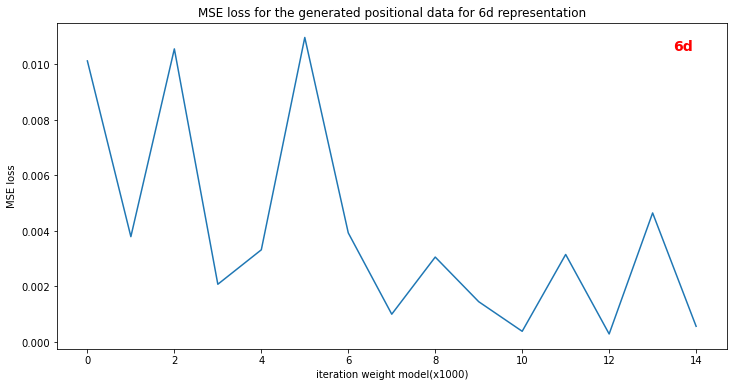

In [23]:
    #  ********* change the representation parameter to the one you want to evaluate, 6d, euler_angles or quartenions or positional *********
calculate_and_plot_mse_loss('6d', calculate_mse_loss, proccess)


Converting Eulers angles to positional - calculate the MSE
Generating training data for ./tmp/euler_train_tmp_bvh_aclstm_martial/
Processing 0000000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0000000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0001000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0001000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0002000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0002000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0003000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0003000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0004000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0004000_out.bvh
---------------------------get_positio

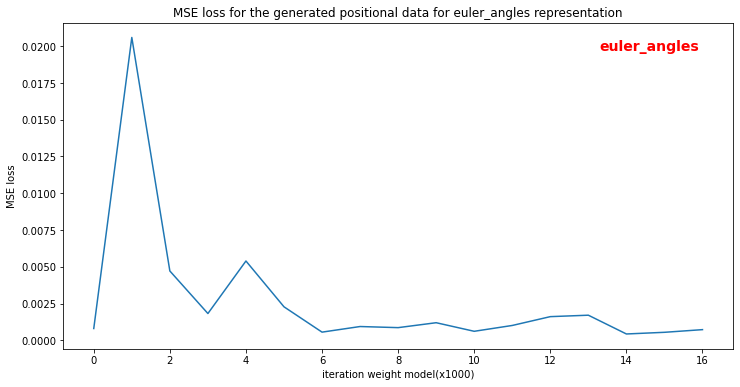

In [24]:
calculate_and_plot_mse_loss('euler_angles', calculate_mse_loss, proccess)


positional data - calculate the MSE
Generating training data for ./tmp/train_tmp_bvh_aclstm_martial/
Processing 0000000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0000000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0001000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0001000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0002000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0002000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0003000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0003000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0004000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0004000_out.bvh
---------------------------get_positional train_data: raw_data
Proc

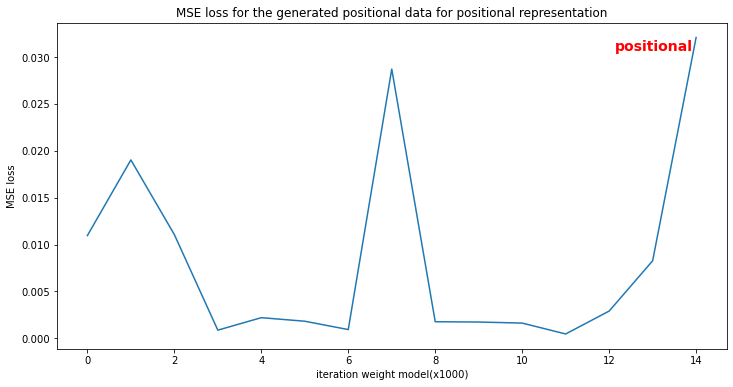

In [25]:
calculate_and_plot_mse_loss('positional', calculate_mse_loss, proccess)

Converting quaternions to positional - calculate the MSE
Generating training data for ./tmp/quar_train_tmp_bvh_aclstm_martial/
Processing 0000000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0000000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0001000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0001000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0002000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0002000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0003000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0003000_out.bvh
---------------------------get_positional train_data: raw_data
Processing 0004000_gt.bvh
---------------------------get_positional train_data: raw_data
Processing 0004000_out.bvh
---------------------------get_positional

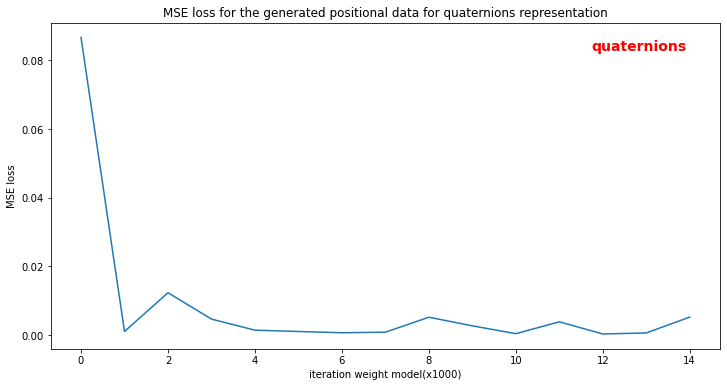

In [26]:
calculate_and_plot_mse_loss('quaternions', calculate_mse_loss, proccess)